In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import yfinance as yf
import pandas_datareader.data as pdr
from datetime import datetime, time
import requests

In [3]:
pd.options.mode.copy_on_write = True 

In [4]:
today = datetime.now().date()
today_formatted = today.strftime("%Y-%m-%d")
n_year_ago = today.replace(year= today.year-25)
n_year_ago_formatted = n_year_ago.strftime("%Y-%m-%d")


In [5]:
API_KEY = "1bf964632306ad3e51bcf2ea7f99cf10"
base_url = "https://financialmodelingprep.com/stable/historical-price-eod/non-split-adjusted"
#https://financialmodelingprep.com/stable/historical-price-eod/full?symbol=AAPL&apikey=1bf964632306ad3e51bcf2ea7f99cf10

In [6]:
def get_jsonparsed_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"failed tpfetch data from {url}")
        return None
    
def fetch(symbol, start, end):
    url = f'{base_url}?symbol={symbol}&from={start}&to={end}&apikey={API_KEY}'
    data = get_jsonparsed_data(url)
    if data is not None:
        df = pd.DataFrame(data)
        return df
    else:
        return None
    


In [26]:

df = fetch('NVDA',n_year_ago_formatted, today_formatted)
df

,symbol,date,adjOpen,adjHigh,adjLow,adjClose,volume
0,NVDA,2025-10-08,186.57,189.42,186.54,188.1599,74157575.0
1,NVDA,2025-10-07,186.23,189.06,184.00,185.0400,140088008.0
2,NVDA,2025-10-06,185.50,187.23,183.33,185.5400,157678104.0
3,NVDA,2025-10-03,189.19,190.36,185.38,187.6200,137596900.0
4,NVDA,2025-10-02,189.60,191.05,188.06,188.8900,136805821.0
...,...,...,...,...,...,...,...
6282,NVDA,2000-10-13,63.06,67.00,62.39,65.1300,2412400.0
6283,NVDA,2000-10-12,66.63,70.50,62.00,62.6300,1673400.0
6284,NVDA,2000-10-11,60.69,68.75,58.25,65.1900,2232400.0
6285,NVDA,2000-10-10,67.00,70.38,64.00,64.6200,1733100.0


In [27]:

d = df.loc[::-1].reset_index(drop=True)
d

,symbol,date,adjOpen,adjHigh,adjLow,adjClose,volume
0,NVDA,2000-10-09,66.69,71.00,62.00,69.9400,2771900.0
1,NVDA,2000-10-10,67.00,70.38,64.00,64.6200,1733100.0
2,NVDA,2000-10-11,60.69,68.75,58.25,65.1900,2232400.0
3,NVDA,2000-10-12,66.63,70.50,62.00,62.6300,1673400.0
4,NVDA,2000-10-13,63.06,67.00,62.39,65.1300,2412400.0
...,...,...,...,...,...,...,...
6282,NVDA,2025-10-02,189.60,191.05,188.06,188.8900,136805821.0
6283,NVDA,2025-10-03,189.19,190.36,185.38,187.6200,137596900.0
6284,NVDA,2025-10-06,185.50,187.23,183.33,185.5400,157678104.0
6285,NVDA,2025-10-07,186.23,189.06,184.00,185.0400,140088008.0


In [28]:
#Formatting the Dataframe
df = d.set_index('date')
df

,symbol,adjOpen,adjHigh,adjLow,adjClose,volume
date,,,,,,
2000-10-09,NVDA,66.69,71.00,62.00,69.9400,2771900.0
2000-10-10,NVDA,67.00,70.38,64.00,64.6200,1733100.0
2000-10-11,NVDA,60.69,68.75,58.25,65.1900,2232400.0
2000-10-12,NVDA,66.63,70.50,62.00,62.6300,1673400.0
2000-10-13,NVDA,63.06,67.00,62.39,65.1300,2412400.0
...,...,...,...,...,...,...
2025-10-02,NVDA,189.60,191.05,188.06,188.8900,136805821.0
2025-10-03,NVDA,189.19,190.36,185.38,187.6200,137596900.0
2025-10-06,NVDA,185.50,187.23,183.33,185.5400,157678104.0



Final Buy & Hold Return for NVDA: 2.69
Final Absolute Momentum Return: 2.88
            adjClose  Daily_Return  Momentum  Signal  Strategy_Return  \
date                                                                    
2000-10-09   69.9400           NaN       NaN       0              NaN   
2000-10-10   64.6200     -0.076065       NaN       0        -0.000000   
2000-10-11   65.1900      0.008821       NaN       0         0.000000   
2000-10-12   62.6300     -0.039270       NaN       0        -0.000000   
2000-10-13   65.1300      0.039917       NaN       0         0.000000   
...              ...           ...       ...     ...              ...   
2025-10-02  188.8900      0.008812  0.555418       1         0.008812   
2025-10-03  187.6200     -0.006723  0.603590       1        -0.006723   
2025-10-06  185.5400     -0.011086  0.561127       1        -0.011086   
2025-10-07  185.0400     -0.002695  0.506227       1        -0.002695   
2025-10-08  188.1599      0.016861  0.506243   

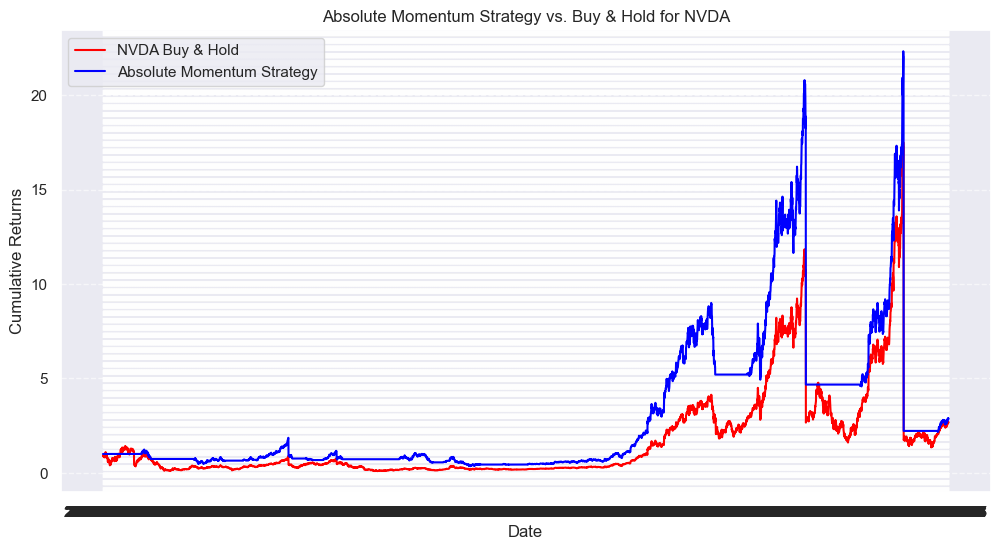

In [29]:
def backtest_absolute_momentum(df, ticker, lookback_period=252):
    """
    Backtests a simple absolute momentum strategy.
    
    Args:
        ticker (str): The stock ticker (e.g., 'SPY' for S&P 500 ETF).
        lookback_period (int): The number of months for the momentum lookback.
        
    Returns:
        pd.DataFrame: A DataFrame with strategy and market performance.
    """
    # 1. Fetch historical data using yfinance
    try:
        #data = yf.download(ticker, period="10y", interval="1mo")
        data = df['adjClose'].to_frame()
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return
        
    # 2. Calculate monthly returns
    data['Daily_Return'] = data['adjClose'].pct_change()
    
    # 3. Calculate absolute momentum (trailing 12-month return)
    data['Momentum'] = data['adjClose'].pct_change(periods=lookback_period)
    
    # 4. Generate trading signals
    # Go long (1) if momentum is positive, otherwise move to cash (0)
    data['Signal'] = np.where(data['Momentum'] > 0, 1, 0)
    
    # 5. Calculate strategy returns
    data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)
    
    # 6. Calculate cumulative returns
    data['Market_Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()
    data['Strategy_Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
    
    return data

# --- Run the backtest and visualize results ---
ticker = 'NVDA'  # Example: S&P 500 ETF
backtest_data = backtest_absolute_momentum(df, ticker)


if backtest_data is not None:
    # 7. Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(backtest_data['Market_Cumulative_Return'], label=f'{ticker} Buy & Hold', color='red')
    plt.plot(backtest_data['Strategy_Cumulative_Return'], label='Absolute Momentum Strategy', color='blue')
    plt.title(f'Absolute Momentum Strategy vs. Buy & Hold for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

# Print a summary
    final_market_return = backtest_data['Market_Cumulative_Return'].iloc[-1]
    final_strategy_return = backtest_data['Strategy_Cumulative_Return'].iloc[-1]
    
    print(f"\nFinal Buy & Hold Return for {ticker}: {final_market_return:.2f}")
    print(f"Final Absolute Momentum Return: {final_strategy_return:.2f}")

    print(backtest_data)


In [30]:
selected_columns = ['symbol', 'adjClose']
new_df = df[selected_columns]
new_df

,symbol,adjClose
date,,
2000-10-09,NVDA,69.9400
2000-10-10,NVDA,64.6200
2000-10-11,NVDA,65.1900
2000-10-12,NVDA,62.6300
2000-10-13,NVDA,65.1300
...,...,...
2025-10-02,NVDA,188.8900
2025-10-03,NVDA,187.6200
2025-10-06,NVDA,185.5400


In [31]:
lookback_period = 252

In [32]:
def abs_momentum_new(new_df, lookback_period, ticker, smoothing_period=20):
    df = pd.DataFrame(index=new_df.index)
    roc = new_df['adjClose'].pct_change(periods = lookback_period)
    df['ROC'] = roc
    df['signal'] = np.where(df['ROC']>0,1,0)
    #df['signal'] = df['signal'].shift(-1)
    #df.dropna(inplace=True)
    df['smoothed_signal'] = df['signal'].rolling(window=smoothing_period).mean()

    df['returns'] = new_df['adjClose'].pct_change()
    strategy_returns = df['signal'].shift(1) * df['returns']
    strategy_returns.dropna(inplace = True)
    cumulative_strategy_returns = (1+ strategy_returns).cumprod()
    cumulative_buy_hold_returns = (1+ df['returns']).cumprod()

    #Plot the curve
    plt.figure(figsize=(12,6))
    plt.plot(cumulative_strategy_returns,label ='Abs Momemtum strategy')
    plt.plot(cumulative_buy_hold_returns,label='Buy and hold', linestyle='--')
    plt.title(f'Abs Momemtum vs Buy and hold for {ticker}')
    plt.xlabel('Date')
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid(True)
    plt.show()

    #Print the summary
    print(f"Buy and hold cumulative Return : {cumulative_buy_hold_returns.iloc[-1]:.2f}")
    print(f"Absolute Momemtum Cumulative Return: {cumulative_strategy_returns.iloc[-1]:.2f}")


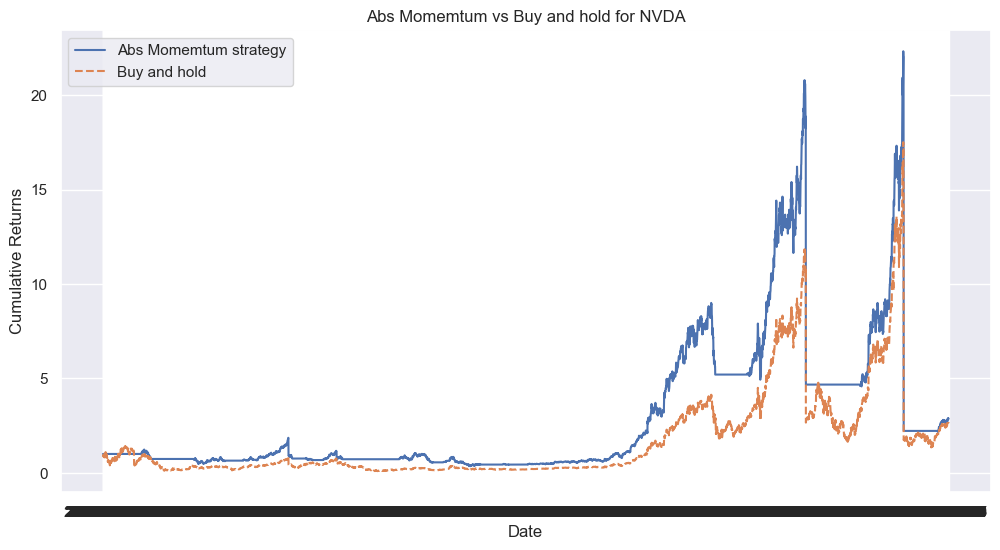

Buy and hold cumulative Return : 2.69
Absolute Momemtum Cumulative Return: 2.88


In [33]:
abs_momentum_new(new_df, 252, 'NVDA')

In [34]:
def abs_momentum(data, lookback_period):
    df = data['adjClose'].to_frame()
    df.loc[:,'returns'] = data.loc[:,'adjClose'].pct_change()
    df.loc[:,'loopback_ema'] = data.loc[:,'adjClose'].ewm(span=lookback_period).mean()
    #Generate signal
    df.loc[:,'buy'] = (data.loc[:,'adjClose'] > df.loc[:,'loopback_ema']) 
    df.loc[:,'sell'] = (data.loc[:,'adjClose'] < df.loc[:,'loopback_ema'])
    
    #Buy securities when buy =1, sell = -1 or hold =0
    df.loc[:,'signal'] = np.where(df.loc[:,'buy']==True, 1, np.where(df.loc[:,'sell']==True, -1,0))

    #calculate daily returns of the strategy
    df.loc[:,'strategy_returns'] = df.loc[:,'signal'].shift(1) * df.loc[:,'returns']
    df.loc[:,'returns+1'] = 1+ df.loc[:,'strategy_returns']

    #calculate cumulative return of teh startegy
    df.loc[:, 'cumulative_returns'] = (1+ df.loc[:,'strategy_returns']).cumprod(skipna=True)

    #print all the returns and final returns
    print('Final returns :', df['cumulative_returns'].iloc[-1])
    return df
    
    



In [35]:
data_1 = abs_momentum(df, lookback_period)
data_1

Final returns : 0.0050763472019309825


,adjClose,returns,loopback_ema,buy,sell,signal,strategy_returns,returns+1,cumulative_returns
date,,,,,,,,,
2000-10-09,69.9400,NaN,69.940000,False,False,0,NaN,NaN,NaN
2000-10-10,64.6200,-0.076065,67.269444,False,True,-1,-0.000000,1.000000,1.000000
2000-10-11,65.1900,0.008821,66.570788,False,True,-1,-0.008821,0.991179,0.991179
2000-10-12,62.6300,-0.039270,65.573831,False,True,-1,0.039270,1.039270,1.030103
2000-10-13,65.1300,0.039917,65.483651,False,True,-1,-0.039917,0.960083,0.988984
...,...,...,...,...,...,...,...,...,...
2025-10-02,188.8900,0.008812,186.188039,True,False,1,0.008812,1.008812,0.005243
2025-10-03,187.6200,-0.006723,186.199358,True,False,1,-0.006723,0.993277,0.005207
2025-10-06,185.5400,-0.011086,186.194146,False,True,-1,-0.011086,0.988914,0.005150


In [36]:
import plotly.graph_objs as go

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_1.index, y = data_1['cumulative_returns'], mode='lines'))
fig.update_layout(autosize = True, minreducedwidth = 250, minreducedheight = 100,
                      width = 1200, height = 500,
                      title = f'Cumulative returns ',
                      xaxis_title = 'year',yaxis_title = "Cumulative Return",
                      showlegend = True)
    
fig.show()